# World of Warcraft 

Data source from: [kaggle](https://www.kaggle.com/datasets/mylesoneill/warcraft-avatar-history?resource=download)

EDA


In [1]:
import os
import datetime
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from src.utils import prep_parquet

In [2]:
org_csv_file_path = "./data/wowah_data.csv"
parquet_file_path = "./data/wowah_data.parquet"

if os.path.exists(parquet_file_path):
    df = pd.read_parquet("./data/wowah_data.parquet")
else:
    prep_parquet(org_csv_file_path, playtime=1)
    df = pd.read_parquet("./data/wowah_data.parquet")

df.head()

,char,level,race,charclass,zone,guild,timestamp
0,59425,1,Orc,Rogue,Orgrimmar,165,2008-01-01 00:02:04
1,65494,9,Orc,Hunter,Durotar,-1,2008-01-01 00:02:04
2,65325,14,Orc,Warrior,Ghostlands,-1,2008-01-01 00:02:04
3,65490,18,Orc,Hunter,Ghostlands,-1,2008-01-01 00:02:04
4,2288,60,Orc,Hunter,Hellfire Peninsula,-1,2008-01-01 00:02:09


In [3]:
print(df.shape)

(10817778, 7)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10817778 entries, 0 to 10817777
Data columns (total 7 columns):
 #   Column     Dtype         
---  ------     -----         
 0   char       int64         
 1   level      int64         
 2   race       object        
 3   charclass  object        
 4   zone       object        
 5   guild      int64         
 6   timestamp  datetime64[ns]
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 577.7+ MB


## Understand features

Analysis around data distribution 


Q: How many unique players?

A: 28,398 players

In [5]:
len(df["char"].unique())

28398

`level`

Q: How many unique levels?

A: 80

In [6]:
print(len(df["level"].unique()))
print(df.groupby(["char","level"]).size())


80
char   level
7      54       10
       55       52
       56       32
       57       27
       58       24
                ..
90576  4         1
       5         1
90577  1         1
       2         1
       3         1
Length: 238313, dtype: int64


<AxesSubplot:xlabel='level'>

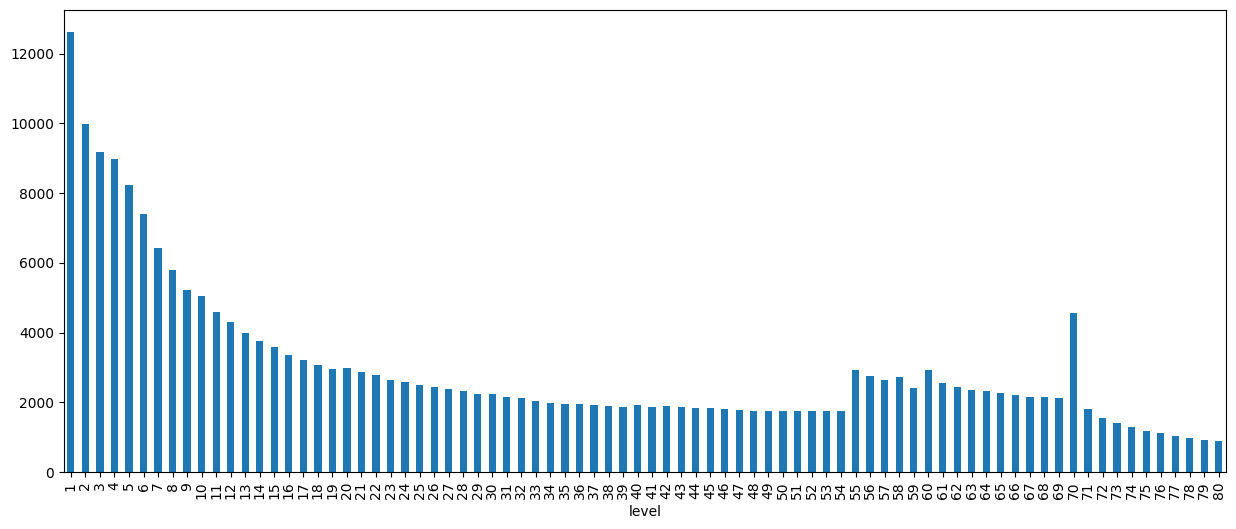

In [7]:
df.groupby(["char","level"]).size().reset_index()[["char","level"]].groupby("level").size().plot.bar(figsize=(15, 6))

`race`

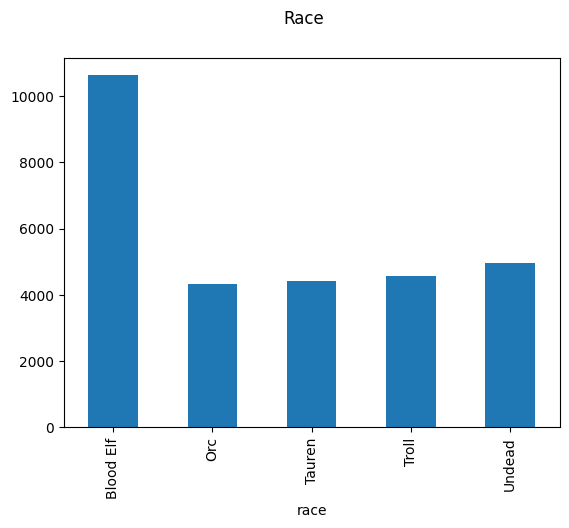

In [8]:
unique_race_char = df.groupby(["char", "race"]).size().reset_index()[["char","race"]]
bar_race = unique_race_char.groupby("race").size().plot.bar()
bar_race.figure.suptitle("Race")
bar_race.figure.savefig("./images/bar_race.png")

level race

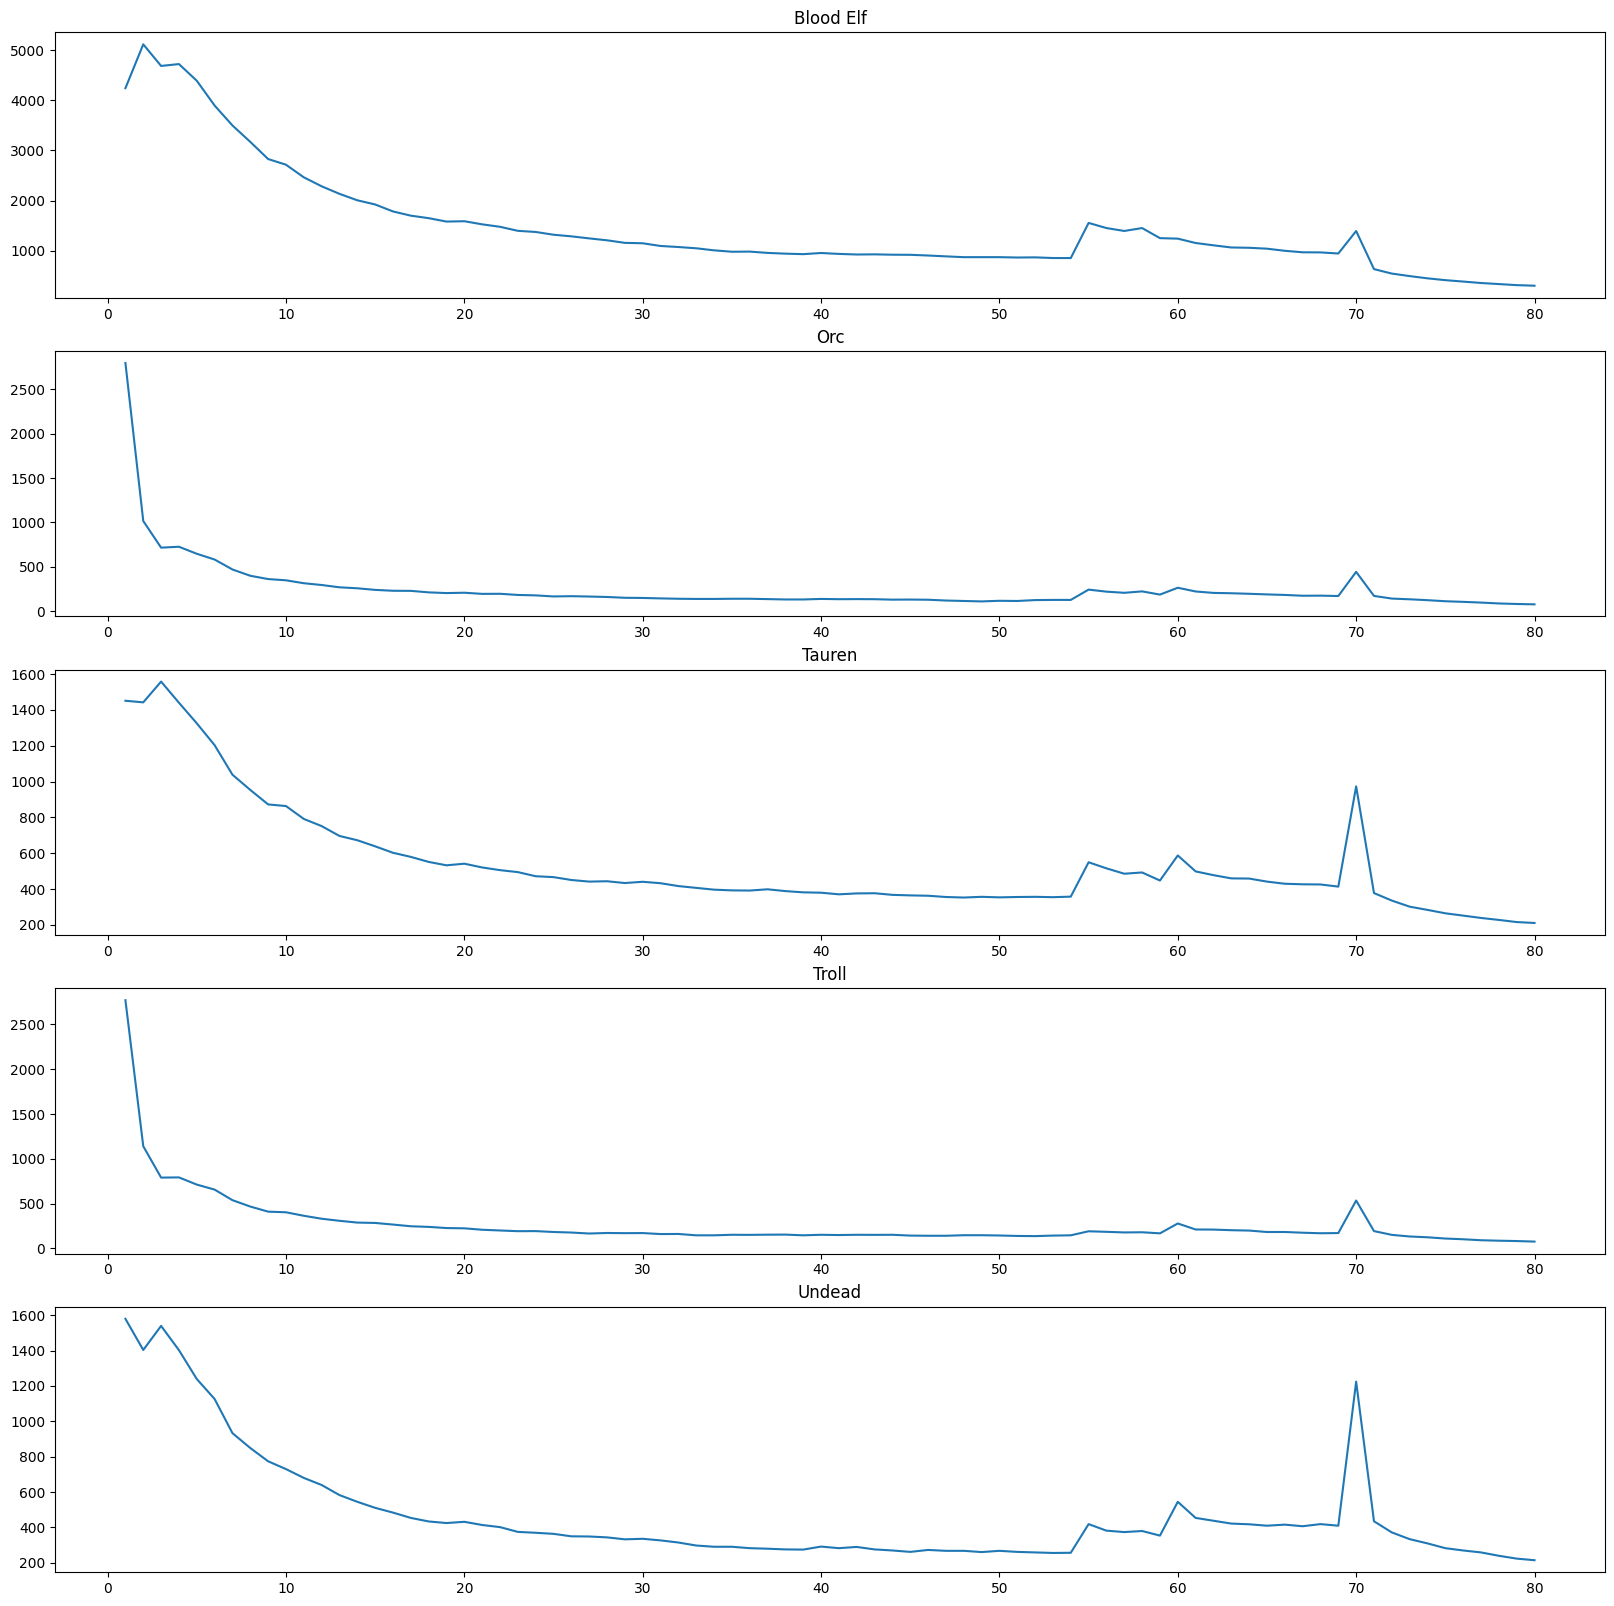

In [9]:
fig, ax = plt.subplots(5,1,figsize=(20, 20))
ax[0].plot(df.groupby(["char","race", "level"]).size().reset_index()[["char","race","level"]].groupby(["race", "level"]).size().unstack().loc["Blood Elf"])
ax[0].set_title("Blood Elf")
ax[1].plot(df.groupby(["char","race", "level"]).size().reset_index()[["char","race","level"]].groupby(["race", "level"]).size().unstack().loc["Orc"])
ax[1].set_title("Orc")
ax[2].plot(df.groupby(["char","race", "level"]).size().reset_index()[["char","race","level"]].groupby(["race", "level"]).size().unstack().loc["Tauren"])
ax[2].set_title("Tauren")
ax[3].plot(df.groupby(["char","race", "level"]).size().reset_index()[["char","race","level"]].groupby(["race", "level"]).size().unstack().loc["Troll"])
ax[3].set_title("Troll")
ax[4].plot(df.groupby(["char","race", "level"]).size().reset_index()[["char","race","level"]].groupby(["race", "level"]).size().unstack().loc["Undead"])
ax[4].set_title("Undead")
plt.show()



`charclass`

<AxesSubplot:>

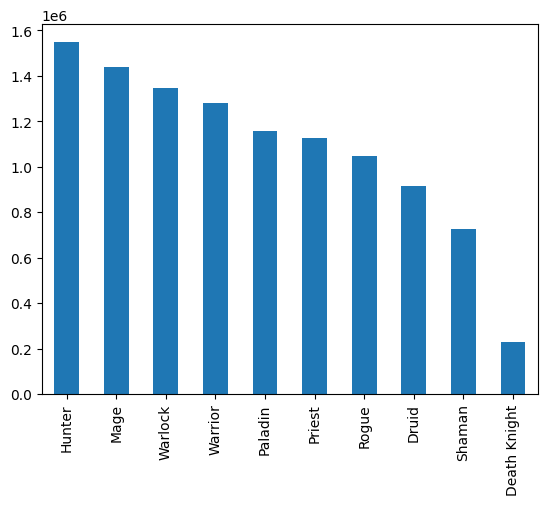

In [10]:
df["charclass"].value_counts().plot.bar()

`zone`

There are unique 158 zones

<AxesSubplot:>

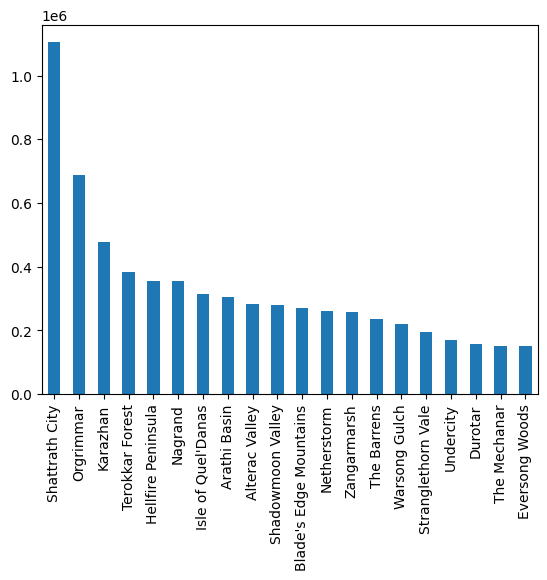

In [11]:
# len(df["zone"].unique())
df["zone"].value_counts()[:20].plot.bar()

`guild`

400 unique guild

`-1` represent no guild

- Does player play game more when they joined a guild?
- How often they join and leave a guild?

In [12]:
print(len(df["guild"].unique()))
print(df.groupby(["char", "guild"]).size().reset_index().groupby(["char","guild"]).size().max())
print(df.groupby(["char", "guild"]).size().reset_index().groupby(["char","guild"]).size().mean())

401
1
1.0


`timestamp`

A year long data
- min : 2008-01-01 00:02:04 
- max : 2008-12-31 23:50:18 

In [13]:
print("min :",df["timestamp"].min(), "\nmax :",df["timestamp"].max(),"\nmean:", df["timestamp"].mean())

min : 2008-01-01 00:02:04 
max : 2008-12-31 23:50:18 
mean: 2008-06-10 11:36:58.564717568


Remove players who has only 1 record

- We can use the player data to understand the early churn of players

In [14]:
print("From ", np.min(df["timestamp"]), "to", np.max(df["timestamp"]))

From  2008-01-01 00:02:04 to 2008-12-31 23:50:18


In [15]:
print("Number of unique players", len(df["char"].unique()))

Number of unique players 28398


In [16]:
df["year"] = df["timestamp"].apply(lambda x: pd.Timestamp(x).year)
df["month"] = df["timestamp"].apply(lambda x: pd.Timestamp(x).month)
df["day"] = df["timestamp"].apply(lambda x: pd.Timestamp(x).day)
df.head()

,char,level,race,charclass,zone,guild,timestamp,year,month,day
0,59425,1,Orc,Rogue,Orgrimmar,165,2008-01-01 00:02:04,2008,1,1
1,65494,9,Orc,Hunter,Durotar,-1,2008-01-01 00:02:04,2008,1,1
2,65325,14,Orc,Warrior,Ghostlands,-1,2008-01-01 00:02:04,2008,1,1
3,65490,18,Orc,Hunter,Ghostlands,-1,2008-01-01 00:02:04,2008,1,1
4,2288,60,Orc,Hunter,Hellfire Peninsula,-1,2008-01-01 00:02:09,2008,1,1


Number of player over time

Wow offers 3 diffenent subscriptions

- 1 month, $ 14.99/month
- 3 months, $ 13.99/month
- 6 months, $ 12.99/month

Free trial up to level 20


In [17]:
play_duration_per_player_df = df.groupby(["char"]).agg({"timestamp":["min","max"]}).reset_index()
play_duration_per_player_df["playduration"] = (play_duration_per_player_df["timestamp"]["max"] - play_duration_per_player_df["timestamp"]["min"]).astype('timedelta64[M]').astype(float) + 1.0
play_duration_per_player_df

char           timestamp                     playduration
                             min                 max             
0          7 2008-01-15 21:47:09 2008-12-28 23:06:41         12.0
1          9 2008-01-01 11:02:20 2008-06-29 21:13:52          6.0
2         10 2008-07-06 17:04:02 2008-11-07 20:33:59          5.0
3         19 2008-01-07 03:01:19 2008-12-29 01:35:10         12.0
4         21 2008-01-01 00:32:25 2008-12-27 15:46:09         12.0
...      ...                 ...                 ...          ...
28393  90572 2008-12-31 20:18:10 2008-12-31 23:48:36          1.0
28394  90573 2008-12-31 20:31:18 2008-12-31 21:31:18          1.0
28395  90575 2008-12-31 20:59:51 2008-12-31 21:14:51          1.0
28396  90576 2008-12-31 22:06:58 2008-12-31 23:07:13          1.0
28397  90577 2008-12-31 22:17:35 2008-12-31 22:47:54          1.0

[28398 rows x 4 columns]

In [18]:
play_duration_per_player_df[play_duration_per_player_df["timestamp"]["min"] < "2008-12-01 00:00:00"]
# .query("min > 2008-12-31")#["playduration"].value_counts()

char           timestamp                     playduration
                             min                 max             
0          7 2008-01-15 21:47:09 2008-12-28 23:06:41         12.0
1          9 2008-01-01 11:02:20 2008-06-29 21:13:52          6.0
2         10 2008-07-06 17:04:02 2008-11-07 20:33:59          5.0
3         19 2008-01-07 03:01:19 2008-12-29 01:35:10         12.0
4         21 2008-01-01 00:32:25 2008-12-27 15:46:09         12.0
...      ...                 ...                 ...          ...
27013  88554 2008-11-30 23:00:27 2008-12-31 21:01:23          2.0
27014  88556 2008-11-30 23:44:36 2008-12-28 00:36:36          1.0
27015  88557 2008-11-30 23:46:58 2008-12-30 20:38:07          1.0
27016  88558 2008-11-30 23:46:58 2008-12-01 01:59:24          1.0
27017  88559 2008-11-30 23:54:45 2008-12-10 20:31:44          1.0

[26853 rows x 4 columns]

<AxesSubplot:>

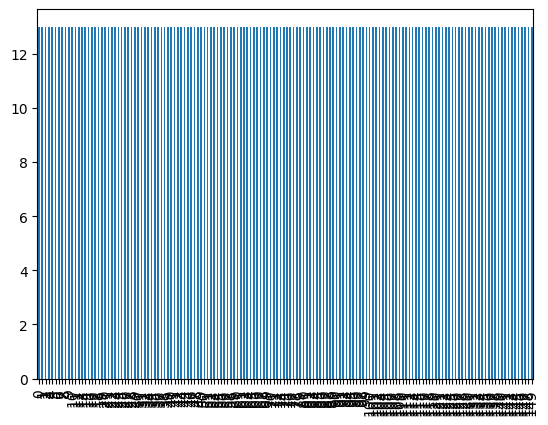

In [19]:
play_duration_per_player_df["playduration"].sort_values(ascending=False).reset_index().iloc[:150]["playduration"].plot.bar()

How frequency play the game 
- Average play times
- 

In [20]:
AVERAGEPLAYCOUNT = int(np.mean(df.groupby(["char"]).size()))
print(f"Average number of play time is {AVERAGEPLAYCOUNT}")

Average number of play time is 380


In [21]:
print(len(df.groupby(["char"]).size()[df.groupby(["char"]).size() > AVERAGEPLAYCOUNT]), "players are played the game more than", AVERAGEPLAYCOUNT, "times.")

4955 players are played the game more than 380 times.


In [22]:
# get the most top 10 players
top10players = df.groupby(["char"]).size().sort_values(ascending=False).index[:10]
top10players

Int64Index([182, 57741, 1384, 59489, 62239, 62446, 31184, 24126, 61105, 35072], dtype='int64', name='char')

<AxesSubplot:xlabel='char'>

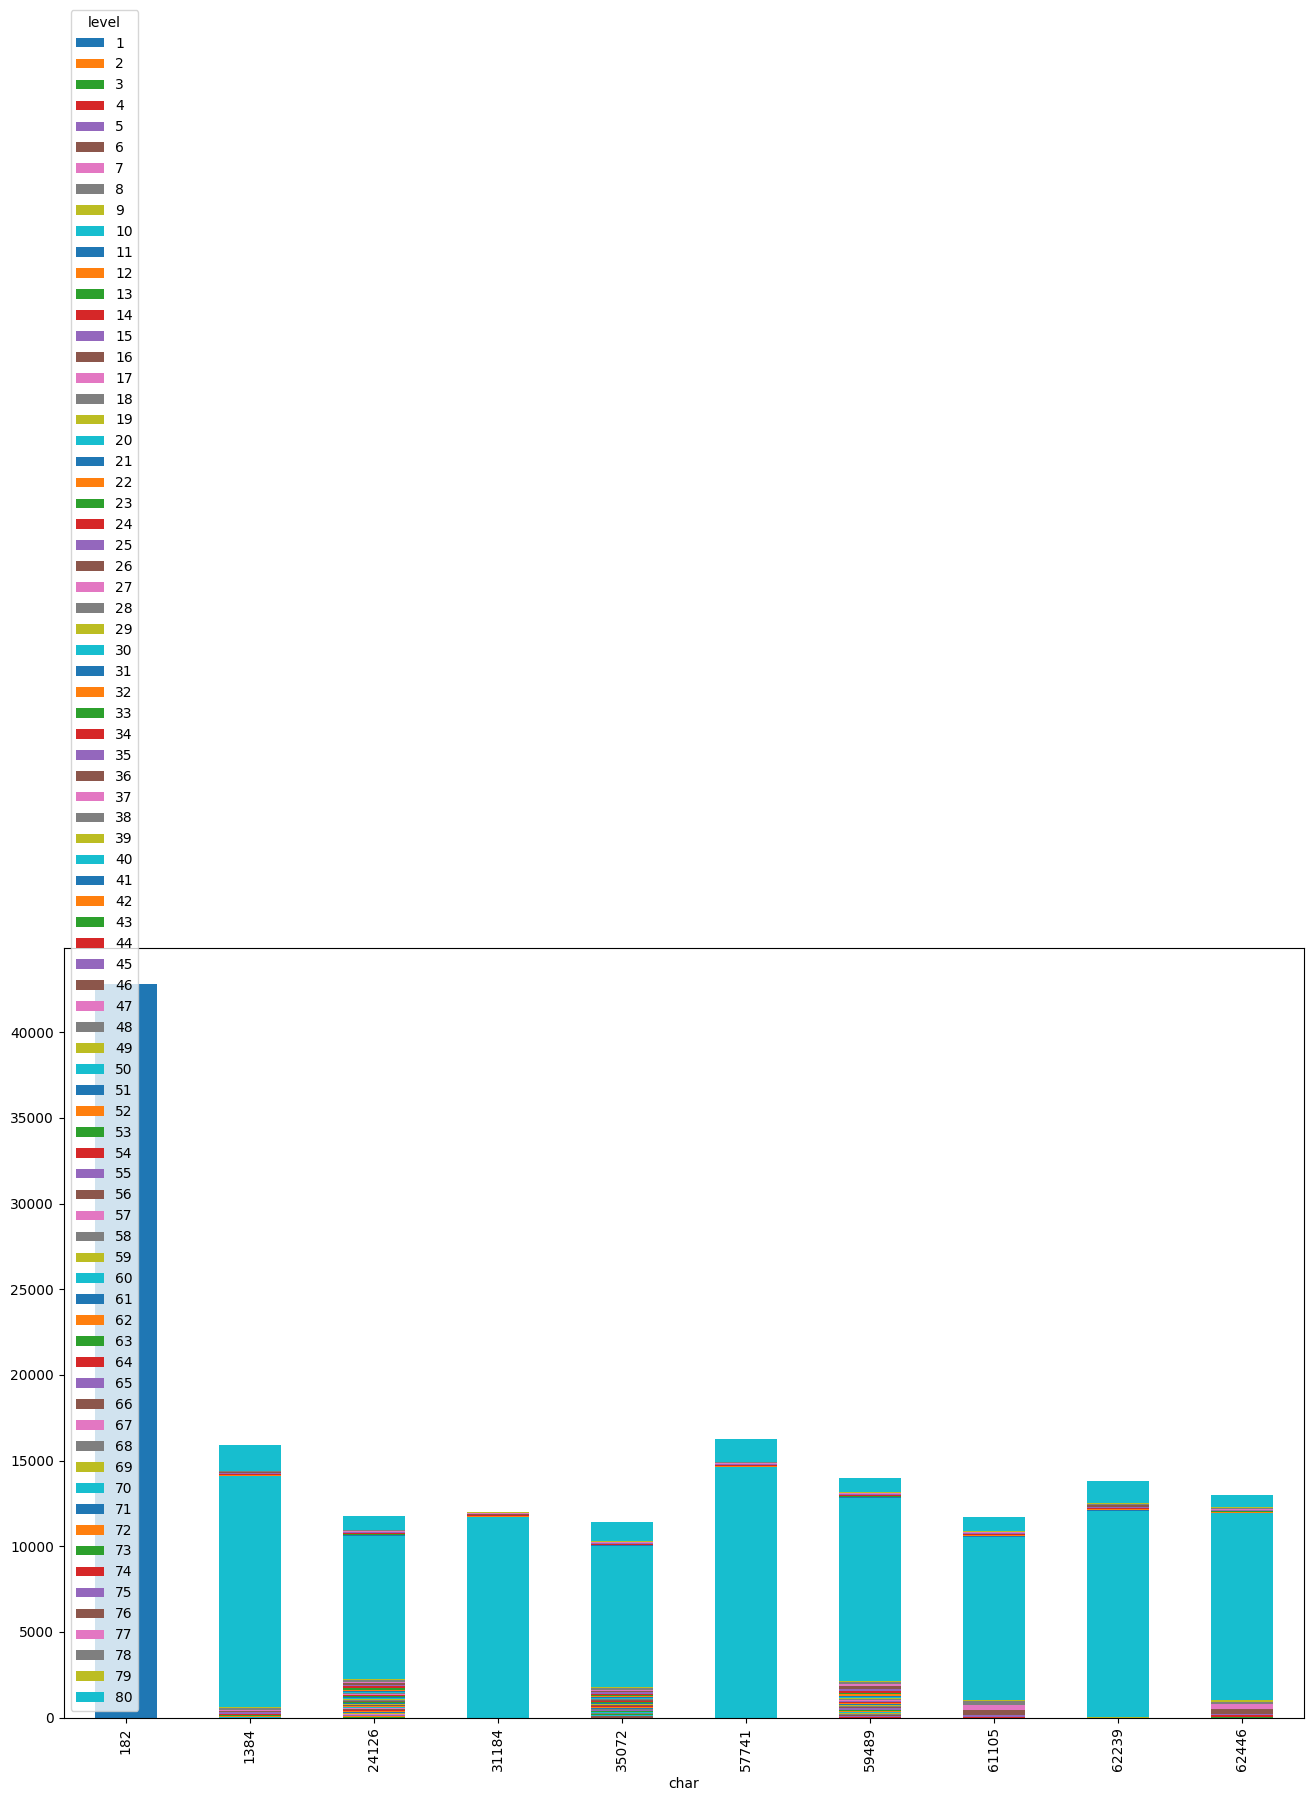

In [23]:
top10player_history = df.query("char in @top10players")
top10player_history.groupby(["char", "level"]).size().unstack().plot.bar(stacked=True, figsize=(16,10))

In [24]:
# get the player who is played the game most

theplayer = df.groupby(["char"]).size()[df.groupby(["char"]).size() == 42801].index[0]
df[df["char"]==10].groupby(["char", "level"]).size()

char  level
10    29       25
      30        7
      31       18
      32       21
      33        8
      34       22
      35       10
      36       12
      37        9
      38       12
      39        9
      40       27
      41       16
      42       15
      43       13
      44       21
      45       15
      46       22
      47       14
      48       33
      49       19
      50       15
      51       42
      52       23
      53       34
      54       19
      55       14
      56       18
      57       19
      58       12
      59       12
      60       35
      61       83
dtype: int64

In [25]:
df.groupby(["char"]).size()

char
7         655
9        2739
10        674
19       3001
21       1513
         ... 
90572      12
90573       5
90575       2
90576       5
90577       3
Length: 28398, dtype: int64

In [26]:
df.groupby(["char"]).size()[df.groupby(["char"]).size()==1]

Series([], dtype: int64)

In [27]:
df[df['char'] == 7]

,char,level,race,charclass,zone,guild,timestamp,year,month,day
622268,7,54,Orc,Hunter,Feralas,-1,2008-01-15 21:47:09,2008,1,15
622881,7,54,Orc,Hunter,Un'Goro Crater,-1,2008-01-15 21:56:54,2008,1,15
623507,7,54,Orc,Hunter,The Barrens,-1,2008-01-15 22:07:23,2008,1,15
624120,7,54,Orc,Hunter,Badlands,-1,2008-01-15 22:17:08,2008,1,15
624741,7,54,Orc,Hunter,Badlands,-1,2008-01-15 22:26:52,2008,1,15
...,...,...,...,...,...,...,...,...,...,...
10735451,7,71,Orc,Hunter,Shadowmoon Valley,-1,2008-12-28 19:19:44,2008,12,28
10742465,7,71,Orc,Hunter,Shadowmoon Valley,-1,2008-12-28 22:24:25,2008,12,28
10743121,7,71,Orc,Hunter,Shadowmoon Valley,-1,2008-12-28 22:37:02,2008,12,28
10743785,7,71,Orc,Hunter,Shadowmoon Valley,-1,2008-12-28 22:54:09,2008,12,28


In [28]:
# df["char"].value_counts()
df.groupby(["char"]).size()[df.groupby(["char"]).size()>1000]

char
9        2739
19       3001
21       1513
23       2140
28       2244
         ... 
87777    1167
87813    1149
87853    1022
88048    1253
88150    1370
Length: 3099, dtype: int64

In [29]:
df[df["char"] == 87853]

,char,level,race,charclass,zone,guild,timestamp,year,month,day
9919010,87853,71,Blood Elf,Paladin,Howling Fjord,-1,2008-11-25 17:55:23,2008,11,25
9919282,87853,71,Blood Elf,Paladin,Howling Fjord,-1,2008-11-25 18:07:50,2008,11,25
9919558,87853,71,Blood Elf,Paladin,Howling Fjord,-1,2008-11-25 18:25:53,2008,11,25
9919848,87853,71,Blood Elf,Paladin,Howling Fjord,-1,2008-11-25 18:37:25,2008,11,25
9920157,87853,71,Blood Elf,Paladin,Howling Fjord,-1,2008-11-25 18:55:32,2008,11,25
...,...,...,...,...,...,...,...,...,...,...
10815591,87853,80,Blood Elf,Paladin,Halls of Lightning,104,2008-12-31 22:49:01,2008,12,31
10816106,87853,80,Blood Elf,Paladin,Halls of Lightning,104,2008-12-31 23:08:20,2008,12,31
10816630,87853,80,Blood Elf,Paladin,Halls of Lightning,104,2008-12-31 23:18:50,2008,12,31
10817160,87853,80,Blood Elf,Paladin,Halls of Lightning,104,2008-12-31 23:37:59,2008,12,31
